In [1]:
# 1. Importing Libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# For better plots in Jupyter Notebook
%matplotlib inline

In [2]:

#  Set seed for reproducibility
np.random.seed(42)

# Create a DataFrame with numeric and categorical columns
sample_data = pd.DataFrame({
    'Age': np.random.randint(20, 60, 100),
    'MonthlySalary': np.random.normal(50000, 15000, 100).astype(int),
    'Dept': np.random.choice(['HR', 'IT', 'Finance', 'Marketing'], 100),
    'Experience_Years': np.random.randint(1, 15, 100),
    'SatisfactionScore': np.random.uniform(1, 10, 100).round(2)
})

print(" Sample dataset preview:\n")
print(sample_data.head())


 Sample dataset preview:

   Age  MonthlySalary       Dept  Experience_Years  SatisfactionScore
0   58          47334    Finance                 5               7.70
1   48          43844         HR                 7               3.26
2   34          67695  Marketing                 1               2.66
3   27          36526  Marketing                 3               1.73
4   40          62521         IT                 2               4.85


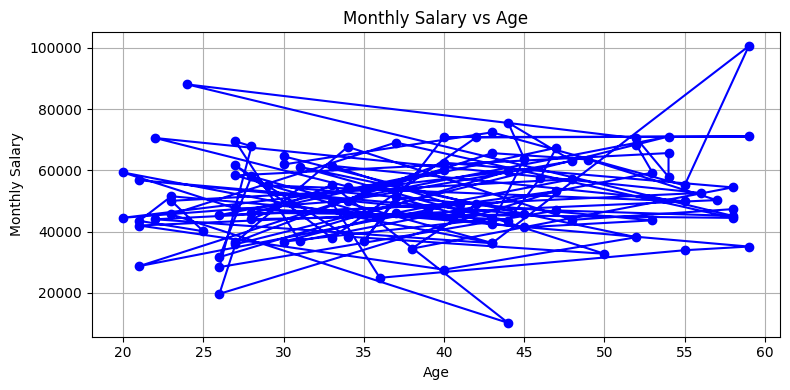

In [ ]:
#  Basic Line Plot: MonthlySalary vs Age
plt.figure(figsize=(8, 4))
plt.plot(sample_data['Age'], sample_data['MonthlySalary'], marker='o', linestyle='-', color='b')
plt.title('Monthly Salary vs Age')
plt.xlabel('Age')
plt.ylabel('Monthly Salary')
plt.grid(True)
plt.tight_layout()
plt.show()



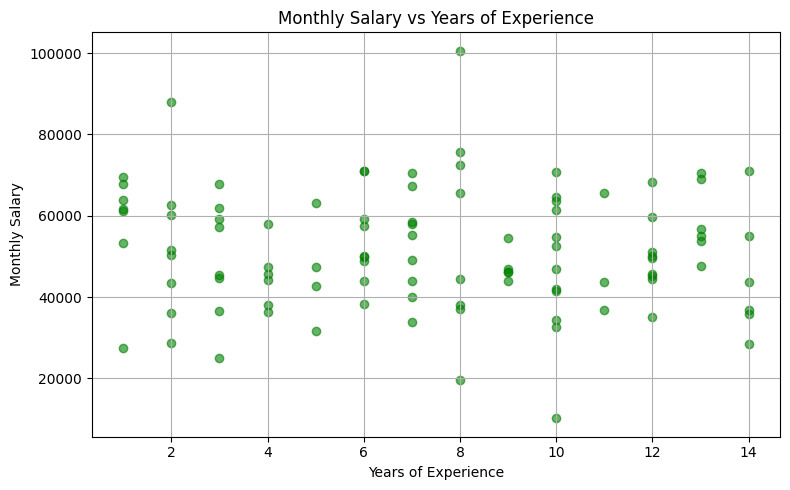

In [ ]:


# Scatter Plot: MonthlySalary vs Experience_Years
plt.figure(figsize=(8, 5))
plt.scatter(sample_data['Experience_Years'], sample_data['MonthlySalary'], c='green', alpha=0.6)
plt.title('Monthly Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Monthly Salary')
plt.grid(True)
plt.tight_layout()
plt.show()


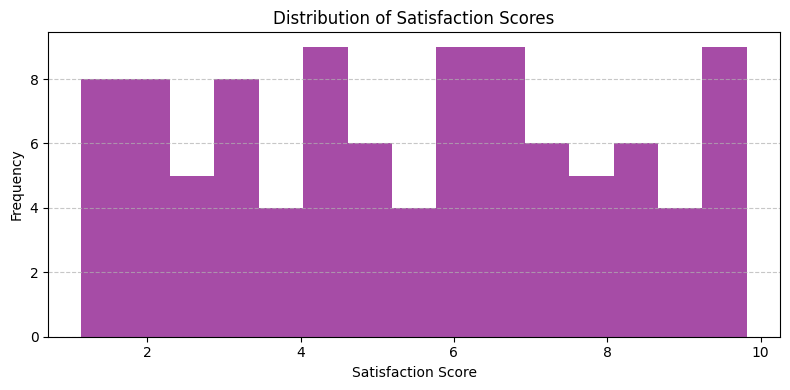

In [ ]:


# Histogram: Distribution of Satisfaction Scores
plt.figure(figsize=(8, 4))
plt.hist(sample_data['SatisfactionScore'], bins=15, color='purple', alpha=0.7)
plt.title('Distribution of Satisfaction Scores')
plt.xlabel('Satisfaction Score')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\deepa\AppData\Local\Temp\ipykernel_17612\944790491.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dept', y='MonthlySalary', data=sample_data, palette='coolwarm')


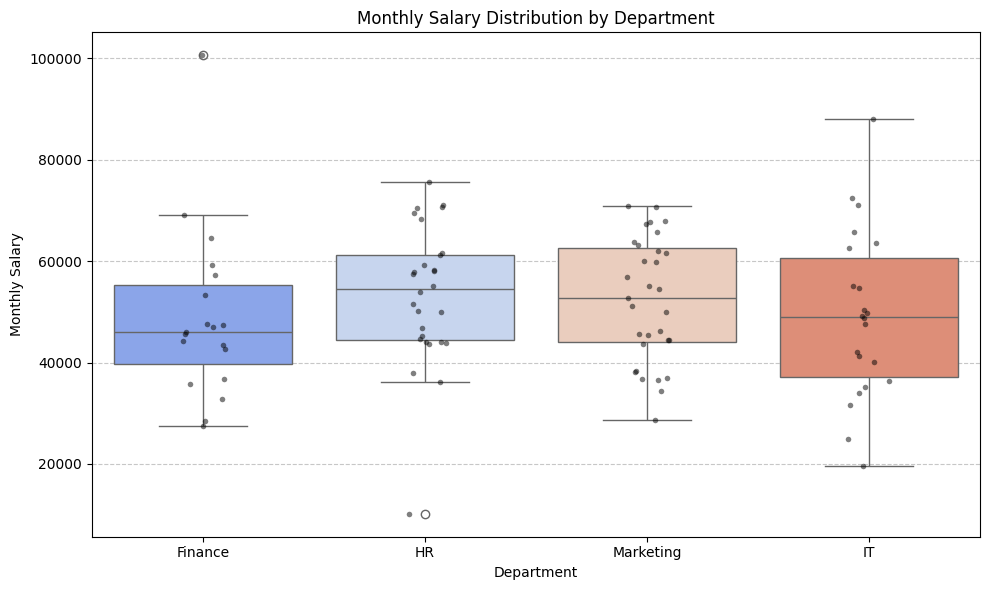

In [ ]:


#  Boxplot with stripplot overlay: MonthlySalary distribution by Dept
plt.figure(figsize=(10, 6))
sns.boxplot(x='Dept', y='MonthlySalary', data=sample_data, palette='coolwarm')

# Overlay individual data points with some jitter
sns.stripplot(x='Dept', y='MonthlySalary', data=sample_data, color='black', size=4, jitter=True, alpha=0.5)

plt.title('Monthly Salary Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Monthly Salary')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\deepa\AppData\Local\Temp\ipykernel_17612\4066247916.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Dept', y='MonthlySalary', data=sample_data, palette='muted')


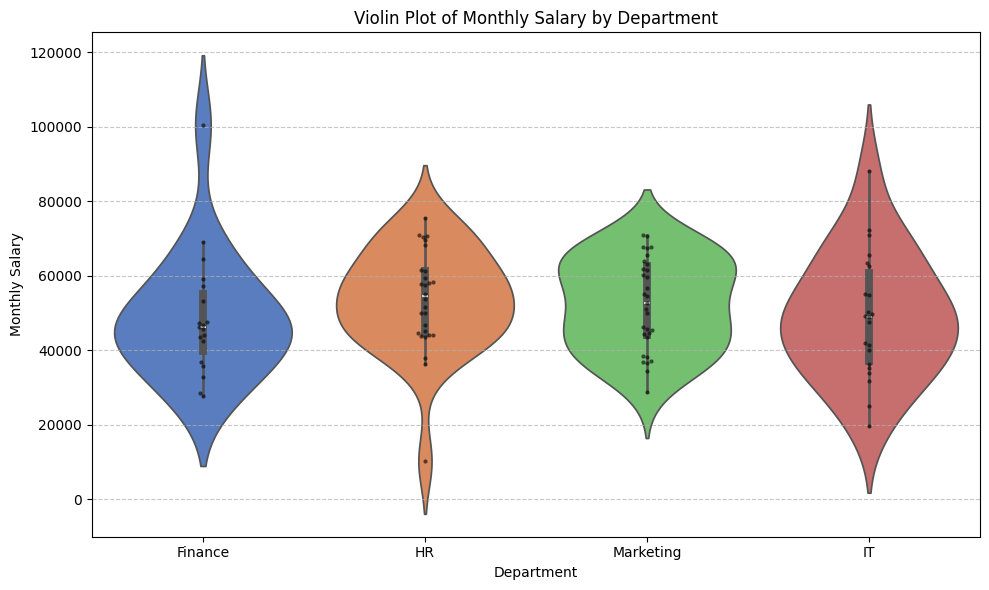

In [ ]:


#  Violin plot with swarmplot overlay: MonthlySalary distribution by Dept
plt.figure(figsize=(10, 6))
sns.violinplot(x='Dept', y='MonthlySalary', data=sample_data, palette='muted')

# Overlay swarmplot to show individual data points
sns.swarmplot(x='Dept', y='MonthlySalary', data=sample_data, color='k', alpha=0.6, size=3)

plt.title('Violin Plot of Monthly Salary by Department')
plt.xlabel('Department')
plt.ylabel('Monthly Salary')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


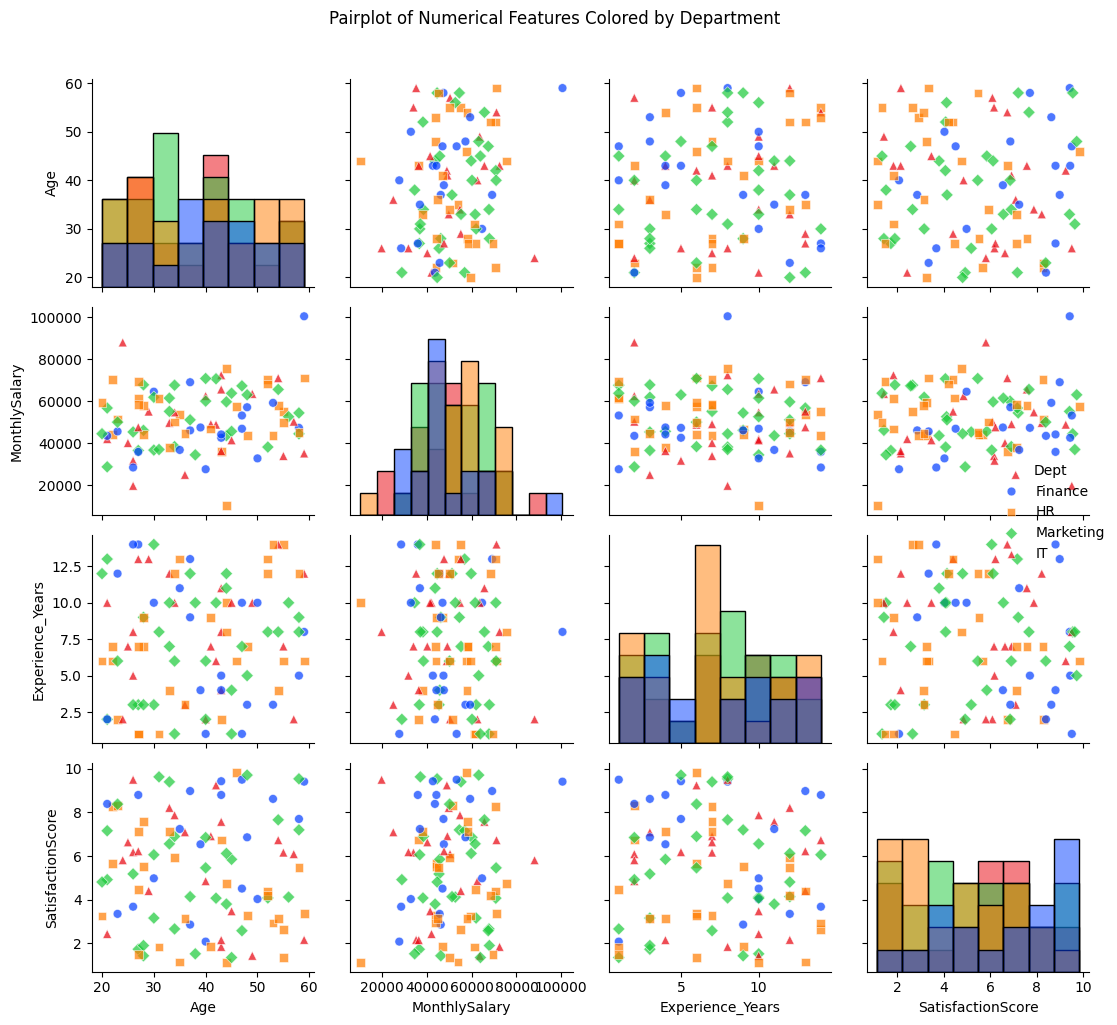

In [ ]:


#  Pairplot with hue by Dept and histograms on diagonal
sns.pairplot(
    sample_data[['Age', 'MonthlySalary', 'Experience_Years', 'SatisfactionScore', 'Dept']], 
    hue='Dept',
    diag_kind='hist',
    markers=["o", "s", "D", "^"],
    palette='bright',
    plot_kws={'alpha':0.7, 's':40}
)

plt.suptitle('Pairplot of Numerical Features Colored by Department', y=1.02)
plt.tight_layout()
plt.show()


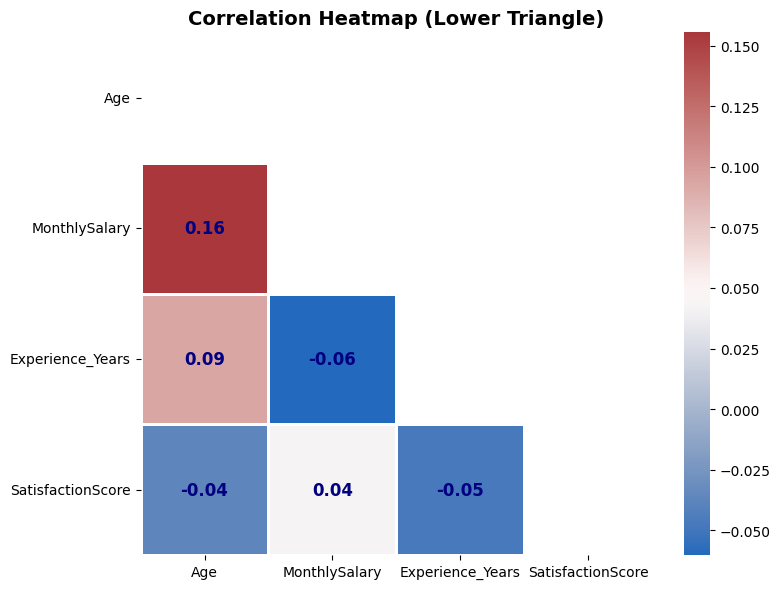

In [11]:

plt.figure(figsize=(8, 6))

# Calculate correlation matrix with updated columns
corr_matrix = sample_data[['Age', 'MonthlySalary', 'Experience_Years', 'SatisfactionScore']].corr()

# Create mask for upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot heatmap with mask and changed style
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='vlag',
    fmt=".2f",
    linewidths=1,
    linecolor='white',
    mask=mask,
    annot_kws={"size": 12, "weight": "bold", "color": "navy"}
)

plt.title('Correlation Heatmap (Lower Triangle)', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


C:\Users\deepa\AppData\Local\Temp\ipykernel_17612\1682323832.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Dept', y='MonthlySalary', data=avg_salary, palette='rocket')


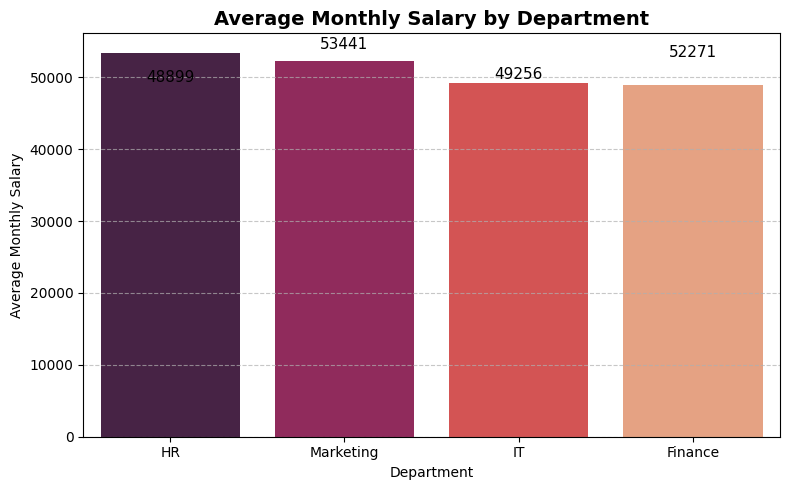

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average salary by department with updated names
avg_salary = sample_data.groupby('Dept')['MonthlySalary'].mean().reset_index()

# Sort by salary descending
avg_salary = avg_salary.sort_values(by='MonthlySalary', ascending=False)

plt.figure(figsize=(8, 5))
barplot = sns.barplot(x='Dept', y='MonthlySalary', data=avg_salary, palette='rocket')

plt.title('Average Monthly Salary by Department', fontsize=14, weight='bold')
plt.xlabel('Department')
plt.ylabel('Average Monthly Salary')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels on bars
for index, row in avg_salary.iterrows():
    barplot.text(index, row.MonthlySalary + 500, f"{row.MonthlySalary:.0f}", color='black', ha="center", fontsize=11)

plt.tight_layout()
plt.show()


C:\Users\deepa\AppData\Local\Temp\ipykernel_17612\3895247940.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dept', y='MonthlySalary', data=sample_data, ax=axs[1, 0], palette='Set1')


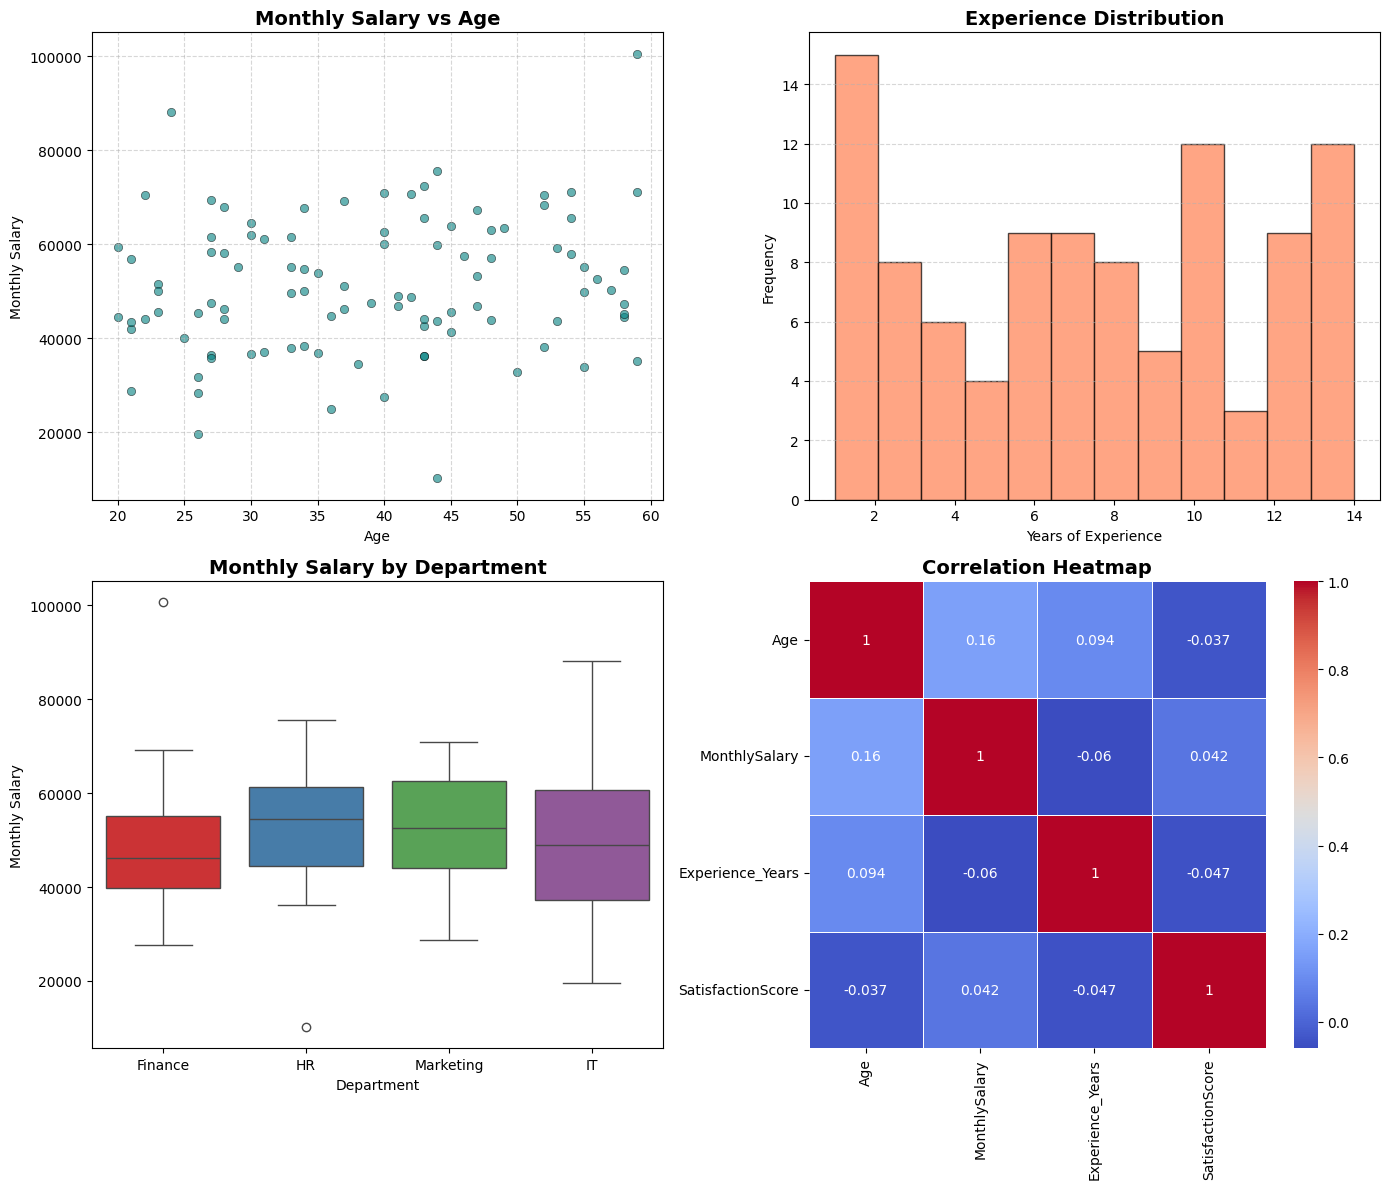

In [16]:


fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Scatter plot: Salary vs Age
axs[0, 0].scatter(sample_data['Age'], sample_data['MonthlySalary'], color='teal', alpha=0.6, edgecolor='k', linewidth=0.5)
axs[0, 0].set_title('Monthly Salary vs Age', fontsize=14, weight='bold')
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_ylabel('Monthly Salary')
axs[0, 0].grid(True, linestyle='--', alpha=0.5)

# Histogram: Experience distribution
axs[0, 1].hist(sample_data['Experience_Years'], bins=12, color='coral', alpha=0.7, edgecolor='black')
axs[0, 1].set_title('Experience Distribution', fontsize=14, weight='bold')
axs[0, 1].set_xlabel('Years of Experience')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].grid(axis='y', linestyle='--', alpha=0.5)

# Boxplot: Salary by Department
sns.boxplot(x='Dept', y='MonthlySalary', data=sample_data, ax=axs[1, 0], palette='Set1')
axs[1, 0].set_title('Monthly Salary by Department', fontsize=14, weight='bold')
axs[1, 0].set_xlabel('Department')
axs[1, 0].set_ylabel('Monthly Salary')

# Correlation heatmap
corr_matrix = sample_data[['Age', 'MonthlySalary', 'Experience_Years', 'SatisfactionScore']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=axs[1, 1], cbar=True, linewidths=0.5, linecolor='white')
axs[1, 1].set_title('Correlation Heatmap', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()
